The idea here is the determine and visualize the type of missing datapresent in the full dataset. 

In [15]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [2]:
data = pd.read_csv("../data/processed/full_dataset_v1.csv")

In [8]:
data.head()
data =data.drop("Unnamed: 0", axis=1 )

In [10]:
na_by_col = np.sum(data.isnull(), axis=0)

In [ ]:
# need the names of the pesticides and the names of the demographics and the names of diseases so that we can split them 
pest = pd.read_csv("../data/processed/pesticide_data_2010.csv")
pest = pest.drop("Unnamed: 0", axis =1)
print(pest.columns)



Index(['FIPS', '2,4-D', '2,4-DB', '6-BENZYLADENINE', 'ABAMECTIN', 'ACEPHATE',
       'ACEQUINOCYL', 'ACETAMIPRID', 'ACETOCHLOR', 'ACIBENZOLAR',
       ...
       'TRIFLUMIZOLE', 'TRIFLURALIN', 'TRIFLUSULFURON', 'TRITICONAZOLE',
       'UNICONAZOLE', 'VINCLOZOLIN', 'ZETA-CYPERMETHRIN', 'ZINC', 'ZIRAM',
       'ZOXAMIDE'],
      dtype='object', length=386)


<Axes: >

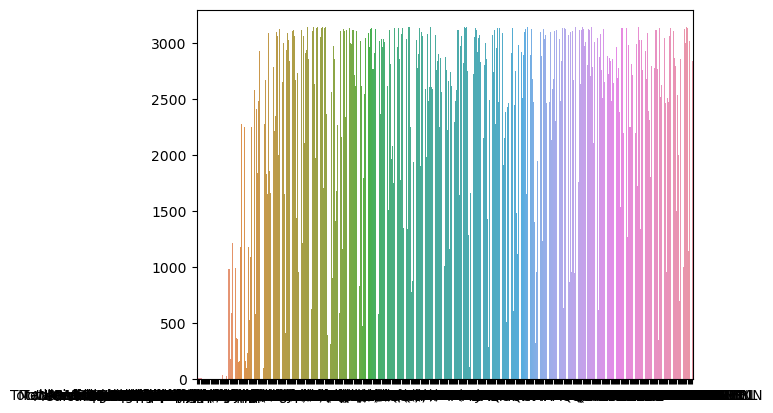

In [21]:

sns.barplot( x= na_by_col.index,y =na_by_col.values)

<Axes: >

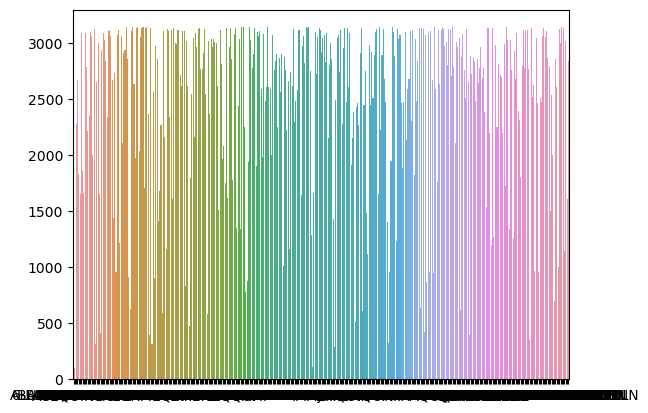

In [22]:
sns.barplot( x= na_by_col[pest.columns].index,y = na_by_col[pest.columns].values)

/Users/eodole/miniforge3/envs/NLP/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

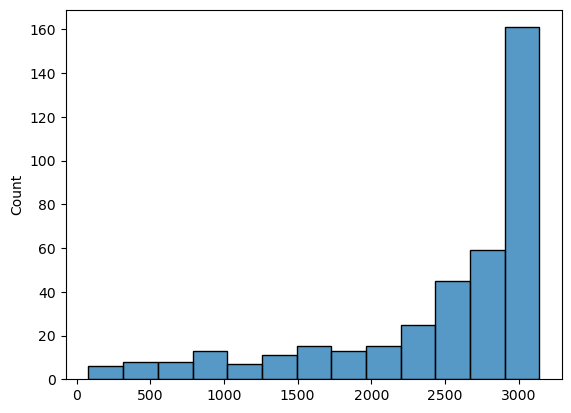

In [ ]:
# histogram of online pesticide data how many are missing 
sns.histplot(na_by_col[pest.columns].values)


/Users/eodole/miniforge3/envs/NLP/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

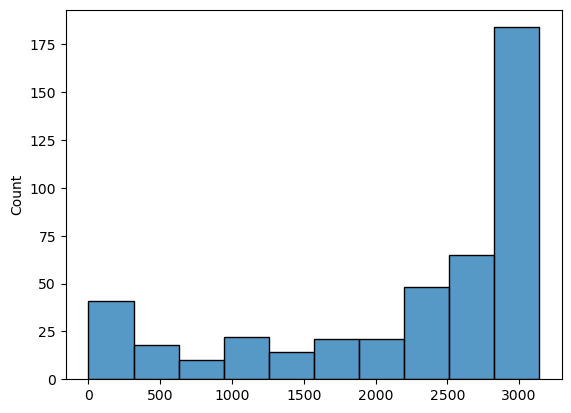

In [27]:
# hist of all data how many are missing per column 
sns.histplot(na_by_col.values)

here we see that there are also more instances of a smaller amount of missing data 

/Users/eodole/miniforge3/envs/NLP/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

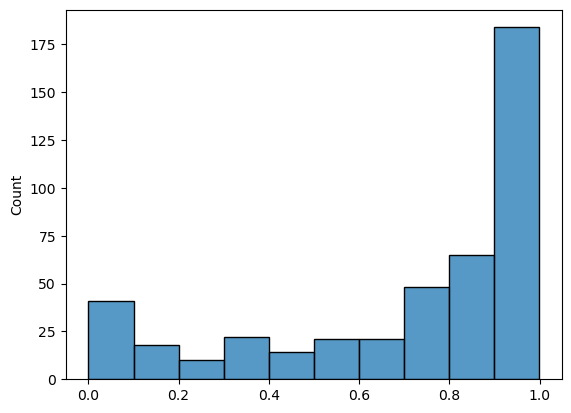

In [28]:
# hist of all data how many are missing per column by percentage 
sns.histplot(na_by_col.values/data.shape[0])

so here we learned that the missingness is uneven which points away from MCAR and more towards MAR and MNAR 
We know for example that virginia data was completely missing from the pesticides data which would imply MAR i.e. a correlation between fips code and missingness, I suspect this is also true for other districts but i need to read about how the data was collected 